The following example shows how to use waypoints to generate a trajectory.

before opt
[0.88789792 1.36420416 0.88789792 0.88789792 1.36420416 0.88789792]
step:0
step:1
step:2
step:3
step:4
step:5
step:6
step:7
step:8
step:9
after opt
[1.33468018 1.22515475 0.5801376  0.58022203 1.22515475 1.33465069]


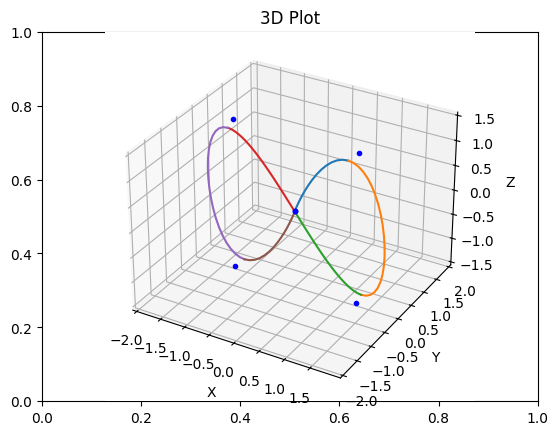

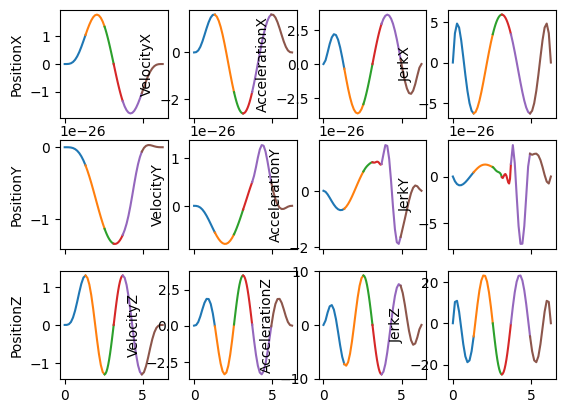

In [ ]:
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import trajectory_config
import trajectory_time_optimizer
import waypoint
import trajectory_logger
import traj_gen_utils

# make figure 8 in Neural Fly paper:
# 2.5m wide, 1.5m tall figure-8 trajectory with a lap time of 6.28s 
width = 1.5
height = 2.5
total_time = 6.28
coordinate_list = []
p1 = [0.0, 0.0, 0.0]    # start from (0, 0, 0)
p2 = [width*0.5, 0.0, height*0.5]
p3 = [width*0.5, 0.0, -height*0.5]
p4 = [0.0, 0.0, 0.0]
p5 = [-width*0.5, 0.0, height*0.5]
p6 = [-width*0.5, 0.0, -height*0.5]
p7 = [0.0, 0.0, 0.0]
points = np.vstack([p1, p2, p3, p4, p5, p6, p7])


waypoints = waypoint.Waypoint(points, total_time)
print('before opt')
print(waypoints.section_time)
config = trajectory_config.TrajectoryConfig()
waypoints, trajectory = trajectory_time_optimizer.find_trajectory_with_optimal_time(waypoints, config)
print('after opt')
print(waypoints.section_time)
trajectory.plot_trajectory()
plt.show()

Save the trajectory to a file.

In [6]:
target_dir = traj_gen_utils.get_dir_from_traj_gen(["data", "map"])
file_name = "figure_8_high_speed.pkl"
trajectory_logger.write_trajectory(trajectory, file_name)    

Trajectory data is written into:
..\data\map\figure_8_high_speed.pkl
